In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re

In [13]:
dataset = pd.read_csv("E:\data.csv")

In [14]:
dataset.drop(columns=["URLs", "Body"],inplace=True, axis=0)

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
ps = PorterStemmer()

def wordopt(text):
    text = text.lower()
    text = re.sub(r'https*\S+', ' ', text)
    text = re.sub(r'[@#]\S+', ' ', text)
    text = re.sub('<.*?>', '', text)
    contractions = {"don't": 'do not', "can't": 'cannot'}
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\s{2,}', ' ', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    return text


In [17]:
dataset["Headline"] = dataset["Headline"].apply(wordopt)
dataset.shape
x = dataset["Headline"]
y = dataset["Label"]


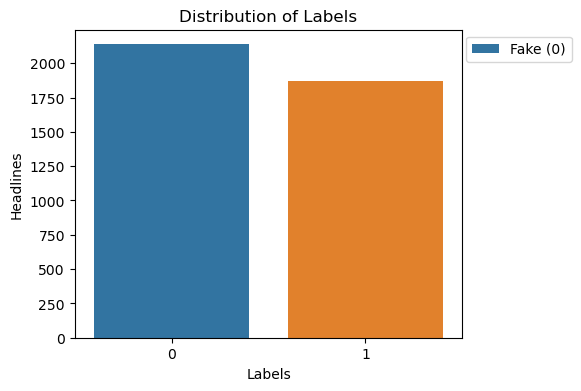

In [18]:
plt.figure(figsize=(5, 4))
#sns.countplot(x='Label', data=dataset)
ax = sns.countplot(x='Label', data=dataset)
#legend_labels, _= ax.get_legend_handles_labels('Fake (0)', 'True (1)')
ax.legend(labels=['Fake (0)', 'True (1)'],bbox_to_anchor=(1.3,1),ncol = 3)

#plt.legend(['Fake (0)', 'True (1)'],loc="center",bbox_to_anchor=(1.15,1),ncol = 3)
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Headlines")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

In [56]:
vectorization = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [152]:
RFC = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state = 12)
RFC.fit(xv_train, y_train)
RFC.score(xv_test,y_test)
pred_rfc=RFC.predict(xv_test) #this function is used to make prediction.

In [153]:
score1 = accuracy_score(y_test,pred_rfc)*100
score1


83.0423940149626

In [154]:
precision1 = precision_score(y_test, pred_rfc)*100
precision1

86.02620087336244

In [155]:
recall1 = recall_score(y_test, pred_rfc)*100
recall1

73.78277153558052

In [156]:
from texttable import Texttable
Data = [["Classifiers", "Average Accuracy", "Average Precision","Average Recall"], ["RFC", score1,precision1,recall1]]
table = Texttable()
table.add_rows(Data)
print(table.draw())

+-------------+------------------+-------------------+----------------+
| Classifiers | Average Accuracy | Average Precision | Average Recall |
+=============+==================+===================+================+
| RFC         | 83.042           | 86.026            | 73.783         |
+-------------+------------------+-------------------+----------------+


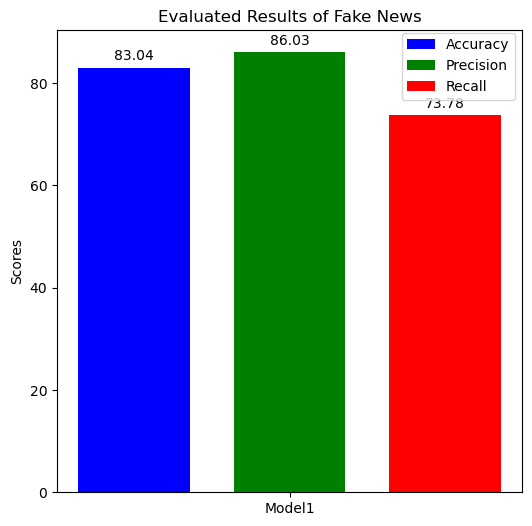

In [157]:
scores = [score1]
precision = [precision1]
recall = [recall1]
models = ["Model1"]
ind = np.arange(len(models))  
width = 0.1800 

fig, ax = plt.subplots(figsize=(6, 6))


rects1 = ax.bar(ind-0.25, scores, width, color='blue', label='Accuracy')
rects2 = ax.bar(ind, precision, width, color='green', label='Precision')
rects3 = ax.bar(ind + 0.25, recall, width, color='red', label='Recall')

# Add some text for labels, title, and axes ticks
ax.set_ylabel('Scores')
#ax.set_xlabel('Model')
ax.set_title('Evaluated Results of Fake News')
ax.set_xticks(ind)
ax.set_xticklabels(models)


ax.legend(["Accuracy", "Precision", "Recall"],bbox_to_anchor =(1, 1.01), ncol = 1)


# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, 1.0*height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
               

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


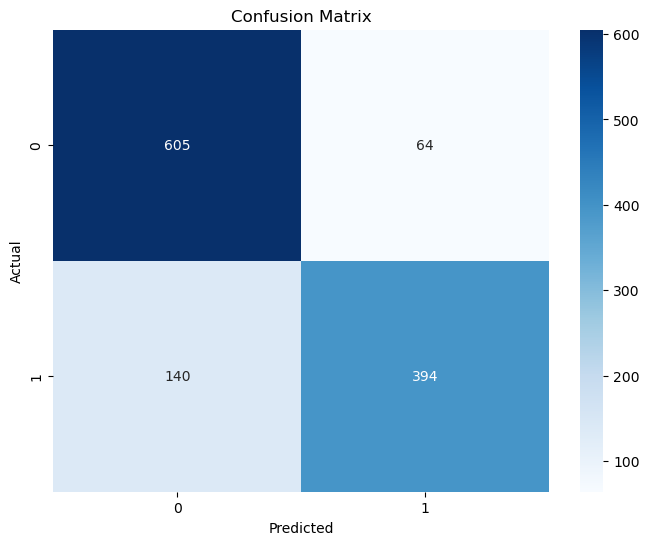

In [158]:
report = classification_report(y_test, pred_rfc)
report
cm = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()